**Getaround delay analysis**

# EXPLORATION DATA

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
delay_documentation = pd.read_excel("get_around_delay_analysis.xlsx", sheet_name='Documentation')
pd.set_option('display.max_colwidth',None)
display(delay_documentation)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


In [4]:
delays = pd.read_excel("get_around_delay_analysis.xlsx", sheet_name='rentals_data')

In [5]:
print(f"The dataset shape is {delays.shape}")
print("The dataset: ")
delays.head()

The dataset shape is (21310, 7)
The dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [6]:
print("Basics statistics: ")
display(delays.describe(include='all'))
print()

Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [7]:
print("Percentage of missing values: ")
display(100*delays.isnull().sum()/delays.shape[0])

Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [8]:
delays['state'].value_counts()

ended       18045
canceled     3265
Name: state, dtype: int64

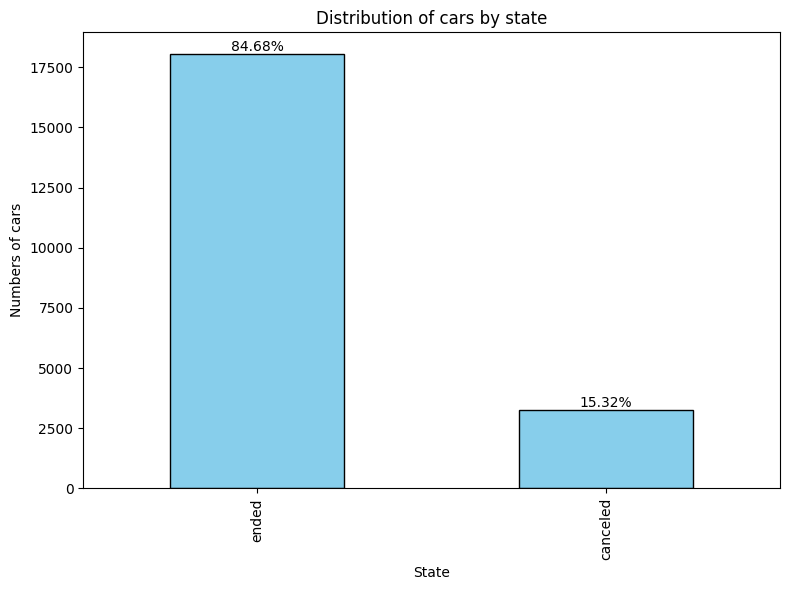

In [9]:
state_counts = delays['state'].value_counts()

# Create figure
plt.figure(figsize=(8, 6))
ax = state_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Percentages
total_entries = delays.shape[0]
for index, value in enumerate(state_counts):
    percentage = (value / total_entries) * 100
    ax.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

#Labels and title
plt.xlabel('State')
plt.ylabel('Numbers of cars')
plt.title('Distribution of cars by state')
plt.tight_layout()
plt.show()

## Canceled cars

In [10]:
canceled_cars = delays[delays['state'] == 'canceled']
canceled_cars.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
10,513743,330658,mobile,canceled,NaN,NaN,NaN
11,514161,366037,connect,canceled,NaN,NaN,NaN


In [11]:
canceled_cars.shape

(3265, 7)

In [12]:
canceled_cars['checkin_type'].value_counts()

mobile     2467
connect     798
Name: checkin_type, dtype: int64

In [13]:
canceled_cars.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,3265.000000,3265.000000,3265,3265,1.0,229.000000,229.000000
unique,NaN,NaN,2,1,NaN,NaN,NaN
top,NaN,NaN,mobile,canceled,NaN,NaN,NaN
freq,NaN,NaN,2467,3265,NaN,NaN,NaN
mean,548637.683920,350585.309954,NaN,NaN,-17468.0,550913.327511,294.890830
std,14907.810897,57254.052866,NaN,NaN,NaN,11955.397600,250.591601
min,504871.000000,159533.000000,NaN,NaN,-17468.0,509972.000000,0.000000
25%,539183.000000,317572.000000,NaN,NaN,-17468.0,543706.000000,60.000000
50%,549700.000000,368593.000000,NaN,NaN,-17468.0,550970.000000,210.000000
75%,560563.000000,394869.000000,NaN,NaN,-17468.0,560395.000000,570.000000


## Cars used

In [14]:
cars = delays[delays['state'] == 'ended']
cars.drop(columns = ['state'], inplace = True)
cars.head()

<ipython-input-14-c2464c3d59e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.drop(columns = ['state'], inplace = True)


,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,-81.0,NaN,NaN
2,508131,359049,connect,70.0,NaN,NaN
4,511440,313932,mobile,NaN,NaN,NaN
5,511626,398802,mobile,-203.0,NaN,NaN
6,511639,370585,connect,-15.0,563782.0,570.0


In [15]:
cars.describe(include='all')

,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,18045.000000,18045.000000,18045,16345.000000,1612.000000,1612.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,mobile,NaN,NaN,NaN
freq,NaN,NaN,14536,NaN,NaN,NaN
mean,549907.422666,349930.236741,NaN,60.773876,550015.764888,277.071960
std,13657.357904,58377.879938,NaN,993.173222,13349.060755,255.157331
min,504806.000000,159250.000000,NaN,-22433.000000,505628.000000,0.000000
25%,540851.000000,317639.000000,NaN,-36.000000,540750.000000,60.000000
50%,550470.000000,368724.000000,NaN,9.000000,550518.000000,180.000000
75%,560453.000000,394928.000000,NaN,67.000000,560876.500000,540.000000


In [16]:
na_value = cars['delay_at_checkout_in_minutes'].isna().value_counts()
na_value

False    16345
True      1700
Name: delay_at_checkout_in_minutes, dtype: int64

In [17]:
on_time_value =  (cars['delay_at_checkout_in_minutes'] == 0).value_counts()
on_time_value

False    17923
True       122
Name: delay_at_checkout_in_minutes, dtype: int64

In [18]:
cars = cars.dropna(subset=['delay_at_checkout_in_minutes'])
cars['delay_at_checkout_in_minutes'].isna().value_counts()

False    16345
Name: delay_at_checkout_in_minutes, dtype: int64

In [19]:
cars['checkin_type'].value_counts()

mobile     12943
connect     3402
Name: checkin_type, dtype: int64

In [20]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(cars)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False,
            autosize=False, height = 1200, width = 1200)
fig.show()

<ipython-input-21-4e272ec282d9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



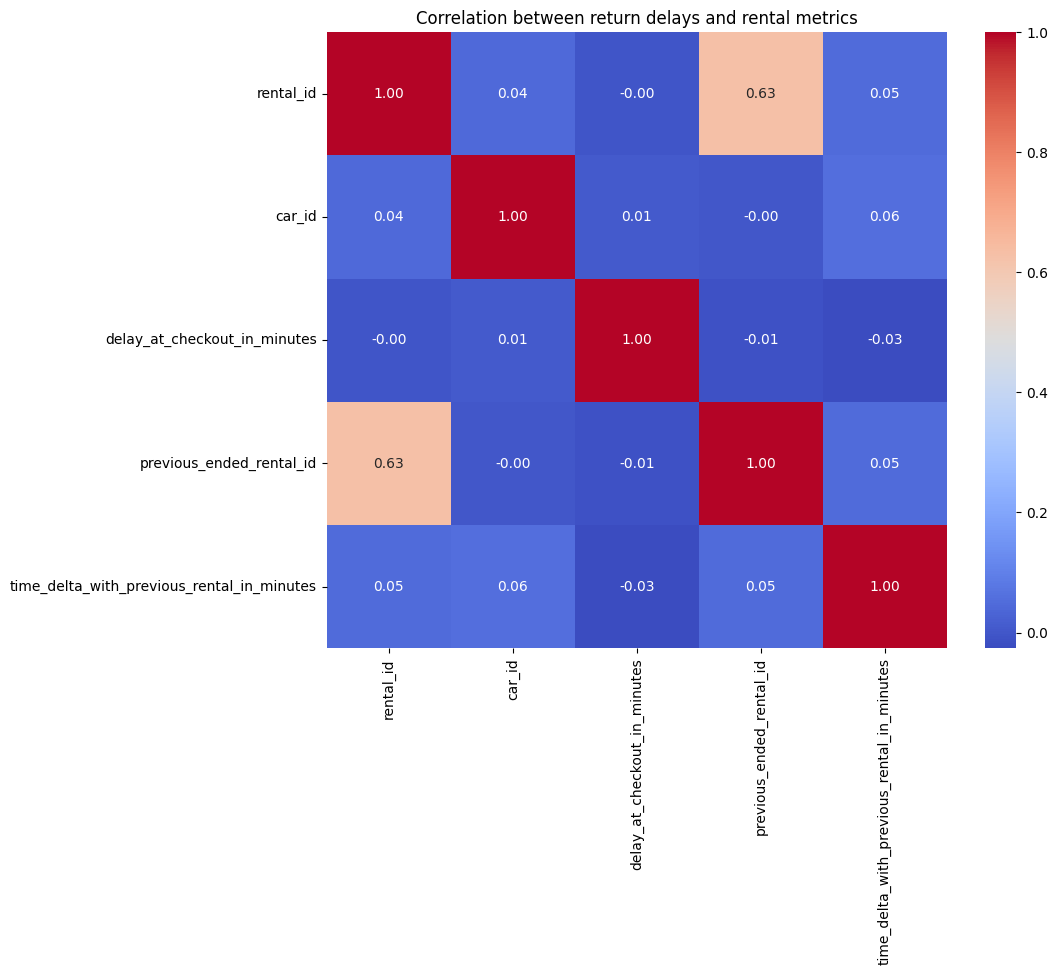

In [21]:
# Analysis of correlation between return delays and other metrics
correlation_matrix = cars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between return delays and rental metrics')
plt.show()

### Delays_at_checkout

In [22]:
cars.isnull().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
delay_at_checkout_in_minutes                      0
previous_ended_rental_id                      14830
time_delta_with_previous_rental_in_minutes    14830
dtype: int64

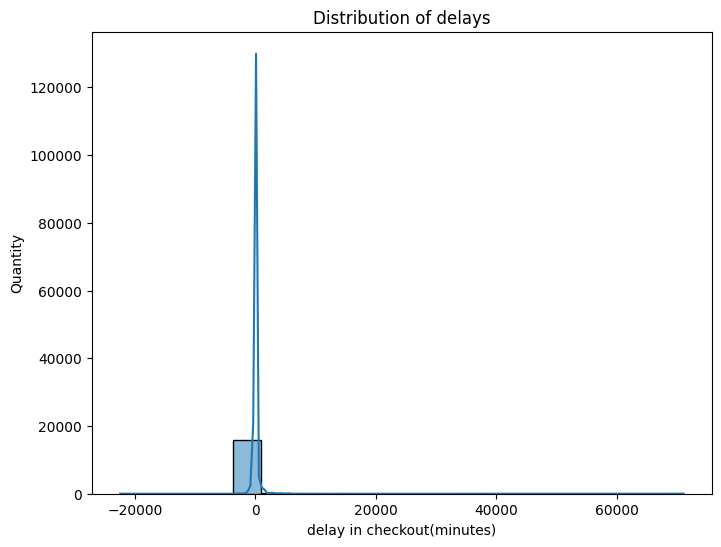

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cars, x='delay_at_checkout_in_minutes', kde=True, bins=20)
plt.xlabel('delay in checkout(minutes)')
plt.ylabel('Quantity')
plt.title('Distribution of delays')
plt.show()

In [24]:
# Delay category
cars['delay_category'] = cars['delay_at_checkout_in_minutes'].apply(lambda x: 'On time or early' if x <= 0
                                                                    else 'less than 15 min' if x <= 15
                                                                    else '1 hour or less of delay' if x <= 60
                                                                    else 'Between 1 and 3 hours of delay' if x <= 180
                                                                    else ' Between 3 and 6 hours of delay' if x <= 360
                                                                    else 'Between 6 hours and one day of delay' if x <= 1440
                                                                    else 'More than one day of delay')

cars.head()

,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_category
1,507750,269550,mobile,-81.0,NaN,NaN,On time or early
2,508131,359049,connect,70.0,NaN,NaN,Between 1 and 3 hours of delay
5,511626,398802,mobile,-203.0,NaN,NaN,On time or early
6,511639,370585,connect,-15.0,563782.0,570.0,On time or early
7,512303,371242,mobile,-44.0,NaN,NaN,On time or early


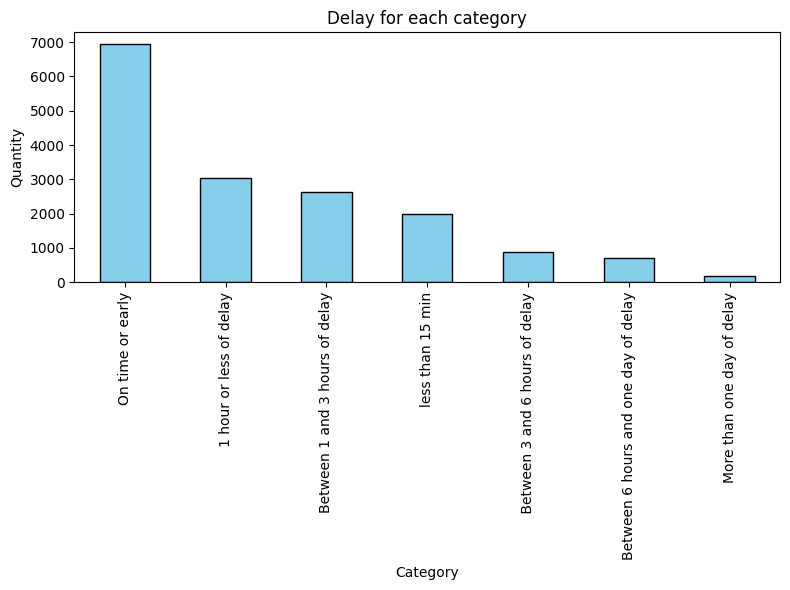

In [25]:
# delay per category
plt.figure(figsize=(8, 6))
cars['delay_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Delay for each category')
plt.tight_layout()
plt.show()

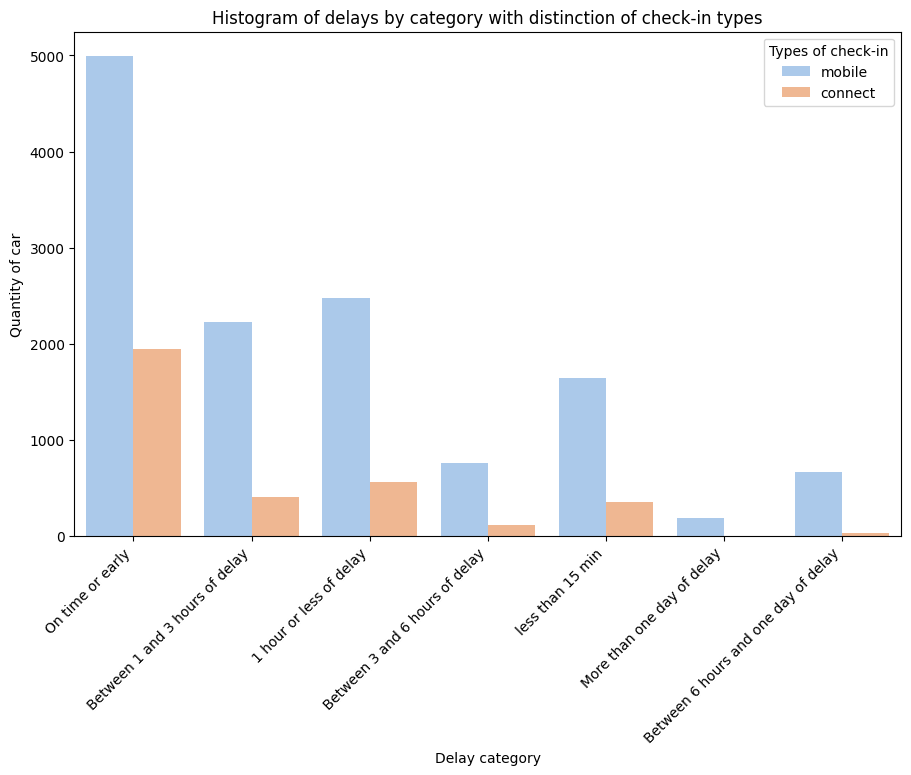

In [26]:
# # delay per category and types of check-in
plt.figure(figsize=(10, 6))
sns.countplot(data=cars, x='delay_category', hue='checkin_type', palette='pastel')
plt.xlabel('Delay category')
plt.ylabel('Quantity of car')
plt.title('Histogram of delays by category with distinction of check-in types')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.legend(title='Types of check-in', loc='upper right')
plt.show()

In [27]:
# percentage of cars on time
on_time = (cars['delay_category'] == 'On time or early').sum()
total_cars = len(cars)
percentage_on_time = (on_time / total_cars) * 100
print(f" Percentage of cars on time or early: {round(percentage_on_time, 2)}%")

 Percentage of cars on time or early: 42.47%


In [28]:
# percentage of cars with less than 3 hours delay
fifteen_min = (cars['delay_category'] == 'less than 15 min').sum()
one_hour_or_less = (cars['delay_category'] == '1 hour or less of delay').sum()
less_3_hours = (cars['delay_category'] == 'Between 1 and 3 hours of delay').sum()

less_than_3_hours = fifteen_min + one_hour_or_less + less_3_hours
total_cars = len(cars)
percentage_3_hours = (less_than_3_hours / total_cars) * 100

print(f" Number of cars with less than 15 min delay: {fifteen_min}")
print(f" Number of cars with less than 1 hour delay: {one_hour_or_less}")
print(f" Number of cars with less than 3 hours delay: {less_3_hours}")
print()
print(f" Percentage of cars with less than 3 hours delay in total: {round(percentage_3_hours, 2)}%")

 Number of cars with less than 15 min delay: 1988
 Number of cars with less than 1 hour delay: 3030
 Number of cars with less than 3 hours delay: 2630

 Percentage of cars with less than 3 hours delay in total: 46.79%


In [29]:
on_time_and_less_than_3_hours = percentage_on_time + percentage_3_hours
print(f" Cars cheking_out on time and the cars with less than 3 hours delays represent {round(on_time_and_less_than_3_hours, 2)} % , of all cars. We must try to find a solution for the cars with less than 3 hours delays.")

 Cars cheking_out on time and the cars with less than 3 hours delays represent 89.26 % , of all cars. We must try to find a solution for the cars with less than 3 hours delays.


### Previous rental

In [30]:
cars.columns

Index(['rental_id', 'car_id', 'checkin_type', 'delay_at_checkout_in_minutes',
       'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes', 'delay_category'],
      dtype='object')

In [31]:
cars_with_previous_rental = cars['previous_ended_rental_id'].notnull().sum()
cars_with_previous_rental

1515

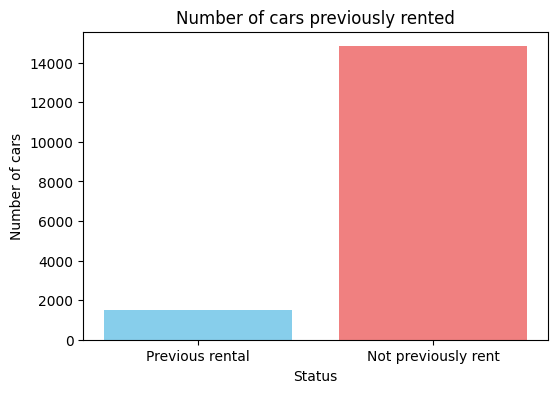

In [32]:
# Count the number of non-rented cars
not_previous_rental = cars.shape[0] - cars_with_previous_rental

# Dataframe
data = pd.DataFrame({'Status': ['Previous rental', 'Not previously rent'], 'Quantity of cars': [cars_with_previous_rental, not_previous_rental]})

# Figure
plt.figure(figsize=(6, 4))
plt.bar(data['Status'], data['Quantity of cars'], color=['skyblue', 'lightcoral'])
plt.xlabel('Status')
plt.ylabel('Number of cars')
plt.title('Number of cars previously rented')
plt.show()

In [33]:
df_with_previous_rental = cars[cars['previous_ended_rental_id'].notnull()]
df_with_previous_rental.head()

,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_category
6,511639,370585,connect,-15.0,563782.0,570.0,On time or early
19,519491,312389,mobile,58.0,545639.0,420.0,1 hour or less of delay
40,528808,181625,connect,-76.0,557404.0,330.0,On time or early
64,533670,320824,connect,-6.0,556563.0,630.0,On time or early
74,534827,404169,mobile,-7.0,531158.0,90.0,On time or early


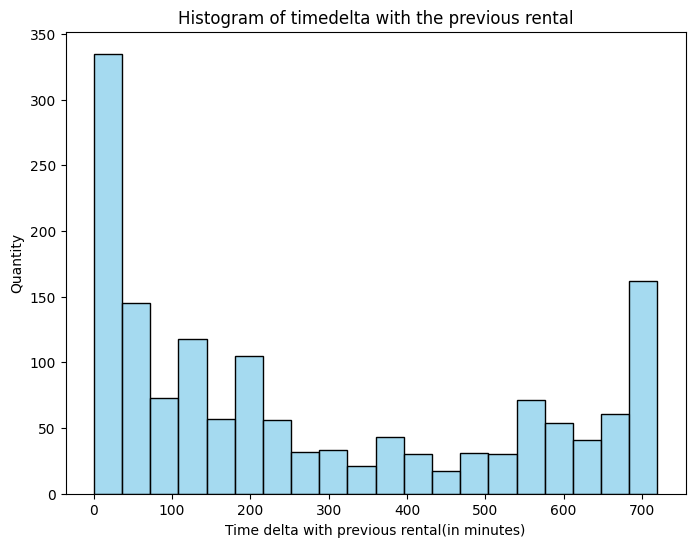

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df_with_previous_rental['time_delta_with_previous_rental_in_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Time delta with previous rental(in minutes)')
plt.ylabel('Quantity')
plt.title('Histogram of timedelta with the previous rental')
plt.show()

In [35]:
# Timedelta category
df_with_previous_rental['time_delta_category'] = df_with_previous_rental['time_delta_with_previous_rental_in_minutes'].apply(lambda x: 'No delay' if x == 0
                                                                    else 'less than 15 min' if x <= 15
                                                                    else '1 hour or less of delta' if x <= 60
                                                                    else 'Between 1 and 3 hours of delta' if x <= 180
                                                                    else ' Between 3 and 6 hours of delta' if x <= 360
                                                                    else 'Between 6 and 12 hours of delta')

df_with_previous_rental.head()

<ipython-input-35-0b58b8c2e5a3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_category,time_delta_category
6,511639,370585,connect,-15.0,563782.0,570.0,On time or early,Between 6 and 12 hours of delta
19,519491,312389,mobile,58.0,545639.0,420.0,1 hour or less of delay,Between 6 and 12 hours of delta
40,528808,181625,connect,-76.0,557404.0,330.0,On time or early,Between 3 and 6 hours of delta
64,533670,320824,connect,-6.0,556563.0,630.0,On time or early,Between 6 and 12 hours of delta
74,534827,404169,mobile,-7.0,531158.0,90.0,On time or early,Between 1 and 3 hours of delta


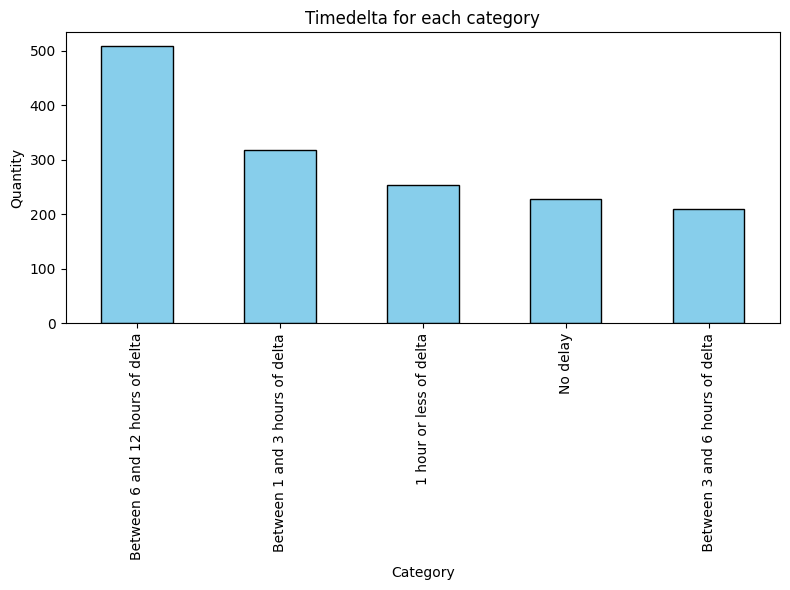

In [36]:
# Timedelta per category
plt.figure(figsize=(8, 6))
df_with_previous_rental['time_delta_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Timedelta for each category')
plt.tight_layout()
plt.show()

In [37]:
# percentage of cars with less than 3 hours timedelta with the previous rental
no_delay = (df_with_previous_rental['time_delta_category'] == 'No delay').sum()
fifteen_min_timedelta = (df_with_previous_rental['time_delta_category'] == 'less than 15 min').sum()
one_hour_or_less_timedelta = (df_with_previous_rental['time_delta_category'] == '1 hour or less of delta').sum()
less_3_hours_timedelta = (df_with_previous_rental['time_delta_category'] == 'Between 1 and 3 hours of delta').sum()

less_than_3_hours_timedelta = no_delay + fifteen_min_timedelta + one_hour_or_less_timedelta + less_3_hours_timedelta
total_cars_with_previous_rent = len(df_with_previous_rental)
percentage_3_hours_timedelta = (less_than_3_hours_timedelta / total_cars_with_previous_rent) * 100

print(f"On {len(df_with_previous_rental)} cars with previous rental : ")
print(f"Number of cars with no timedelta: {no_delay}")
print(f"Number of cars with less than 15 min timedelta: {fifteen_min_timedelta}")
print(f"Number of cars with less than 1 hour timedelta: {one_hour_or_less_timedelta}")
print(f"Number of cars with less than 3 hours timedelta: {less_3_hours_timedelta}")
print()
print(f"Among the cars rented previously,{round(percentage_3_hours_timedelta, 2)}% were re-rented within three hours. ")

On 1515 cars with previous rental : 
Number of cars with no timedelta: 227
Number of cars with less than 15 min timedelta: 0
Number of cars with less than 1 hour timedelta: 253
Number of cars with less than 3 hours timedelta: 318

Among the cars rented previously,52.67% were re-rented within three hours. 
